In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X,y = make_circles(n_samples=100, noise=0.1,random_state=1)

<Axes: >

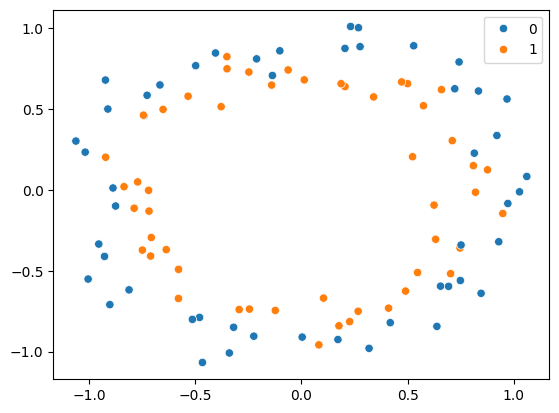

In [5]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [6]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [7]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [11]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [12]:
record = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=3500,verbose =0)

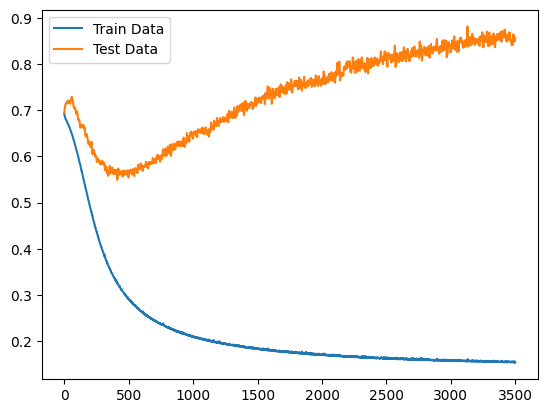

In [13]:
plt.plot(record.history["loss"],label="Train Data")
plt.plot(record.history["val_loss"],label="Test Data")
plt.legend()
plt.show()

9600/9600 [==============================] - 18s 2ms/step


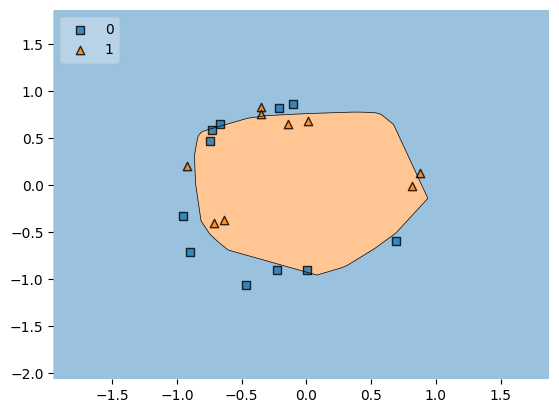

In [15]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()

**Early Stopping**

In [16]:
model = Sequential()

model.add(Dense(256,input_dim=2,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [17]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [23]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline = None,
    restore_best_weights=False
)

In [24]:
new_record = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3500,callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 0s 83ms/step - loss: 0.6752 - accuracy: 0.5625 - val_loss: 0.7259 - val_accuracy: 0.3500
Epoch 2/3500
3/3 [==============================] - 0s 43ms/step - loss: 0.6747 - accuracy: 0.5625 - val_loss: 0.7249 - val_accuracy: 0.3500
Epoch 3/3500
3/3 [==============================] - 0s 49ms/step - loss: 0.6741 - accuracy: 0.5625 - val_loss: 0.7250 - val_accuracy: 0.3500
Epoch 4/3500
3/3 [==============================] - 0s 40ms/step - loss: 0.6735 - accuracy: 0.5625 - val_loss: 0.7251 - val_accuracy: 0.3500
Epoch 5/3500
3/3 [==============================] - 0s 34ms/step - loss: 0.6730 - accuracy: 0.5625 - val_loss: 0.7245 - val_accuracy: 0.3500
Epoch 6/3500
3/3 [==============================] - 0s 36ms/step - loss: 0.6724 - accuracy: 0.5625 - val_loss: 0.7242 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 30ms/step - loss: 0.6720 - accuracy: 0.5625 - val_loss: 0.7236 - val_accuracy: 0.4000
Epoch 8/3500


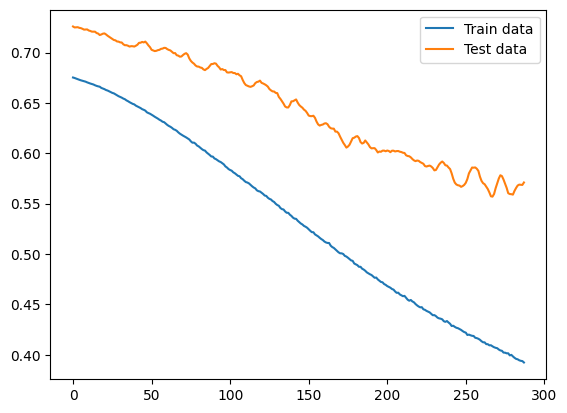

In [25]:
plt.plot(new_record.history["loss"],label="Train data")
plt.plot(new_record.history["val_loss"],label="Test data")
plt.legend()
plt.show()